# Titanic Classification

# 1. 데이터 전처리 및 EDA

## 1.1 데이터 로딩

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df_train= pd.read_csv('train.csv')
df_test= pd.read_csv('test.csv')
df_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
print(df_train.shape, df_test.shape)

(891, 12) (418, 11)


## 1.2 결측치 처리

1. Age: 평균값으로 대체
2. Cabin
3. Embarked: 최빈값으로 대체

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### 1) Age 평균값 대체

In [12]:
df_train['Age']= df_train['Age'].fillna(df_train['Age'].mean())

#### 2) Cabin 대체
Cabin 열을 추후 feature_engineering을 통해 변형할 계획이므로 'Z'로 대체

In [14]:
df_train['Cabin']= df_train['Cabin'].fillna('Z')

#### 3) Embarked 대체
결측값이 2개인 object이므로 최빈값으로 대체

In [16]:
df_train['Embarked']= df_train['Embarked'].fillna(df_train['Embarked'].mode()[0])

#### 4) 필요없는 열 Drop

In [18]:
df_train= df_train.drop(['PassengerId', 'Name', 'Ticket'], axis=1)

#### 최종확인

In [20]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     891 non-null    object 
 8   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


## 1.3 특성 공학

### 1) Cabin 열 특성 공학
    1. Null 값으로 3등석 유무 집계
    2. 복수 티켓 예약자의 경우 티켓 예약 매수 카운트
    3. 첫 번째 일파벳으로 숙박위치를 추정

In [23]:
# 복수의 티켓이 모두 같은 칸에 탔는지 확인

# 리스트내 첫글자가 모두 같은지 확인하는 함수
def check_first_char(list):
    f_char= list[0][0]
    for i in list:
        if f_char!=i[0]:
            return True
    

for idx, cabin in enumerate(df_train['Cabin']):
    cabin= cabin.split(' ')
    if check_first_char(cabin):
        print(idx, cabin)

# 4명이 다른 칸을 예약함 그냥 적은 수기 때문에 그냥 진행

75 ['F', 'G73']
128 ['F', 'E69']
699 ['F', 'G63']
715 ['F', 'G73']


4명이 다른 칸을 예약함 그냥 적은 수기 때문에 그냥 진행

#### 1.1) NULL 집계
Null=1, Not_Null=0

In [26]:
df_train['Survived'].iloc[[75,128,699,715]]

75     0
128    1
699    0
715    0
Name: Survived, dtype: int64

In [27]:
df_train['Cabin_Null']= [1 if i=='Z' else 0 for i in df_train['Cabin']]

#### 1.2) 예약매수

In [29]:
df_train['N_ticket']= [len(tlist.split(' ')) if isinstance(tlist.split(' '), list) else 1 for tlist in df_train['Cabin'] ]

#### 1.3) 객실 위치 (Cabin 첫글자)

In [31]:
# 리스트 첫번째 첫글자 추출

df_train['Cabin_loc']= [tlist[0][0] if isinstance(tlist.split(' '), list) else tlist[0] for tlist in df_train['Cabin'] ]

In [32]:
df_train= df_train.drop(['Cabin'], axis=1)

In [33]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    object 
 3   Age         891 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   Embarked    891 non-null    object 
 8   Cabin_Null  891 non-null    int64  
 9   N_ticket    891 non-null    int64  
 10  Cabin_loc   891 non-null    object 
dtypes: float64(2), int64(6), object(3)
memory usage: 76.7+ KB


## 1.4 특성 시각화

#### 1.4.1 Boxplot
생존 여부에 Pcalss가 큰 영향을 주는 것을 확인할 수 있다 

In [36]:
def visualization_feature(df):

    columns_num= df.columns[df.dtypes!= object]
    fig, axs= plt.subplots(3,4, figsize= (12,12))

    for i in range(3):
        for j in range(4):
            if df.iloc[:,i*2+j].name in columns_num:
                data= [ df.iloc[:,i*2+j][df['Survived']==1], df.iloc[:,i*2+j][df['Survived']!=1]]
                axs[i,j].boxplot(data)
                axs[i,j].set_title(f'{ df.iloc[:,i*2+j].name } vs Survived')
            else:
                pass

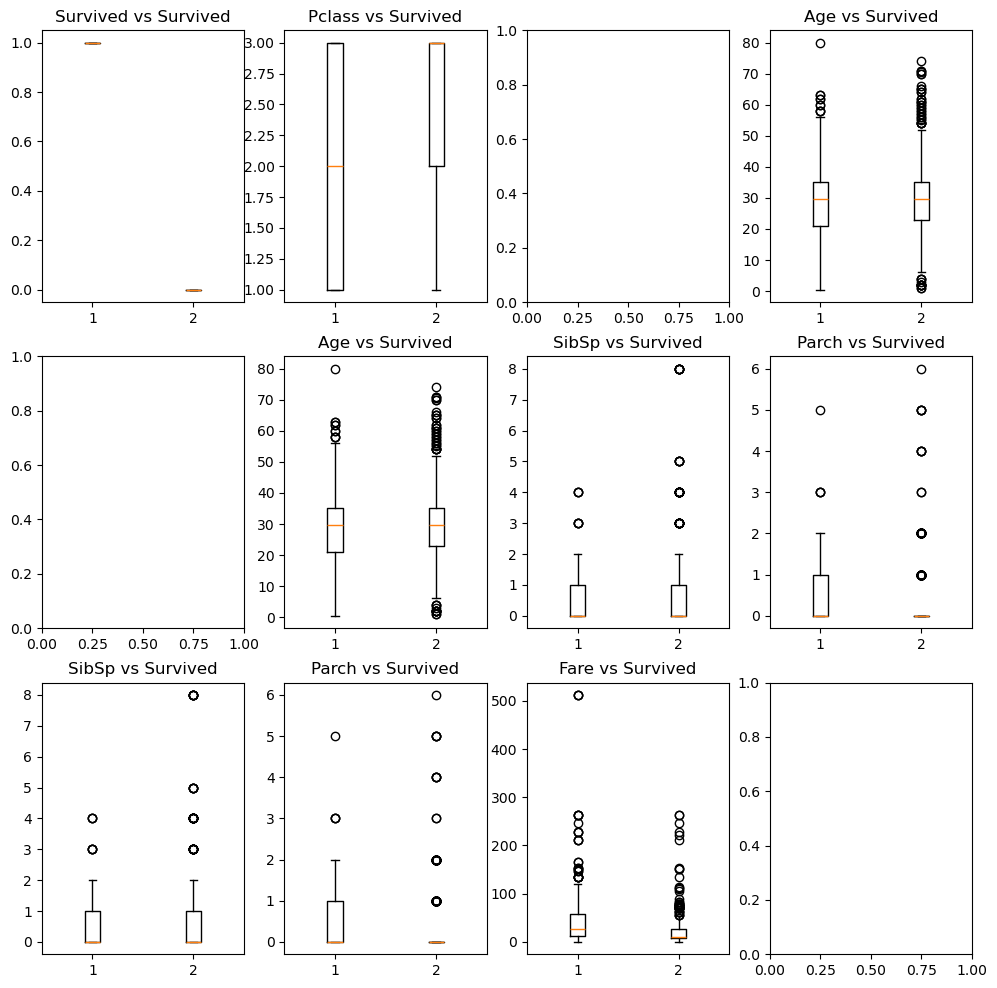

In [37]:
visualization_feature(df_train)

#### 1.4.2 Correlation Matrix
Pclass와 Fare가 생존과 큰 상관관계가 있다

<Axes: >

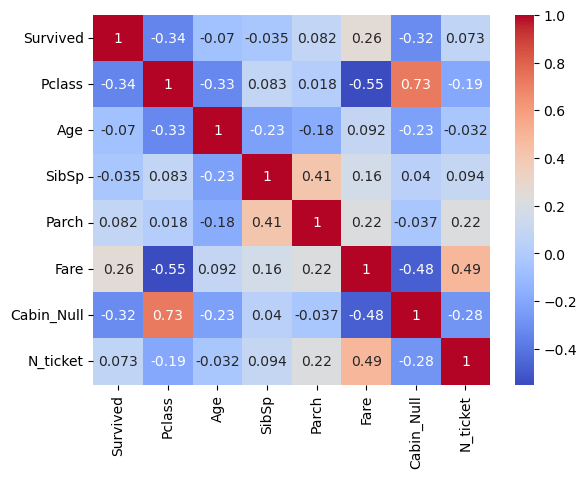

In [39]:
import seaborn as sns
sns.heatmap(df_train.select_dtypes(exclude='object').corr(), annot=True, cmap='coolwarm')

## 1.5 데이터 변환

### 1.5.1 테스트셋 변환

In [42]:
passid= df_test['PassengerId']
df_test['Age']= df_test['Age'].fillna(df_test['Age'].mean())
df_test['Cabin']= df_test['Cabin'].fillna('Z')
df_test['Embarked']= df_test['Embarked'].fillna(df_test['Embarked'].mode()[0])
df_test= df_test.drop(['PassengerId', 'Name', 'Ticket'], axis=1)

for idx, cabin in enumerate(df_test['Cabin']):
    cabin= cabin.split(' ')
    if check_first_char(cabin):
        print(idx, cabin)

df_test['Cabin_Null']= [1 if i=='Z' else 0 for i in df_test['Cabin']]
df_test['N_ticket']= [len(tlist.split(' ')) if isinstance(tlist.split(' '), list) else 1 for tlist in df_test['Cabin'] ]
# 리스트 첫번째 첫글자 추출

df_test['Cabin_loc']= [tlist[0][0] if isinstance(tlist.split(' '), list) else tlist[0] for tlist in df_test['Cabin'] ]
df_test= df_test.drop(['Cabin'], axis=1)

57 ['F', 'G63']
288 ['F', 'E46']
321 ['F', 'E57']


### 1.5.2 더미 변환

In [44]:
df_train= pd.get_dummies(df_train)
df_test= pd.get_dummies(df_test)

In [45]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Age          891 non-null    float64
 3   SibSp        891 non-null    int64  
 4   Parch        891 non-null    int64  
 5   Fare         891 non-null    float64
 6   Cabin_Null   891 non-null    int64  
 7   N_ticket     891 non-null    int64  
 8   Sex_female   891 non-null    bool   
 9   Sex_male     891 non-null    bool   
 10  Embarked_C   891 non-null    bool   
 11  Embarked_Q   891 non-null    bool   
 12  Embarked_S   891 non-null    bool   
 13  Cabin_loc_A  891 non-null    bool   
 14  Cabin_loc_B  891 non-null    bool   
 15  Cabin_loc_C  891 non-null    bool   
 16  Cabin_loc_D  891 non-null    bool   
 17  Cabin_loc_E  891 non-null    bool   
 18  Cabin_loc_F  891 non-null    bool   
 19  Cabin_lo

In [46]:
from sklearn.model_selection import train_test_split

X= df_train.iloc[:,1:]
y= df_train.iloc[:,0]

X_train, X_val, y_train, y_val= train_test_split(X, y, random_state=42)

# 2. 분류 모델 생성

## 2.1 Logistic Regresssion

### 2.1.1 베이스모델 점수

In [50]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

# 교차검증 함수
def cross_val(model):
    scores= cross_val_score(lr, X, y, scoring='accuracy', cv= kfold)
    print(f'model_acc: {scores}')
    print(f'model_mean_acc: {scores.mean()}')

In [51]:
from sklearn.linear_model import LogisticRegression

lr= LogisticRegression(max_iter=10000, random_state=7604)
lr.fit(X_train, y_train)

kfold= StratifiedKFold(n_splits=3, shuffle=True, random_state=7604)

cross_val(lr)

model_acc: [0.8047138 0.7979798 0.8013468]
model_mean_acc: 0.8013468013468014


### 2.1.2 하이퍼 파라미터 튜닝
##### 최상의 파라미터
best_params: {'C': 4.281332398719396, 'max_iter': 50, 'penalty': 'l2', 'solver': 'lbfgs'}
##### 최상의 점수
best_scores: 0.8069584736251403

#### Penalty, Solver 튜닝

In [55]:
from sklearn.model_selection import GridSearchCV 

params = [
    {'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
    {'penalty': ['l2'], 'solver': ['lbfgs', 'newton-cg', 'sag']},
    {'penalty': ['l1', 'l2', 'elasticnet'], 'solver': ['saga'], 'l1_ratio': [0.1, 0.5, 0.7]}
]
clf= GridSearchCV(lr, params, cv= kfold)
best_clf= clf.fit(X, y)

print(f'best_params: {best_clf.best_params_}')
print(f'best_scores: {best_clf.best_score_}')

C:\Users\dlwog\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\dlwog\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\dlwog\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\dlwog\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\dlwog\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\dlwog\anaconda3\Lib\site-packag

best_params: {'penalty': 'l2', 'solver': 'newton-cg'}
best_scores: 0.8024691358024691


#### max_iter와 C 튜닝

In [57]:
from sklearn.model_selection import GridSearchCV 

params= {'penalty': ['l2'],
        'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
         'max_iter' : np.arange(50,1000, 50), 
         'C' : np.logspace(-4, 4, 20)
        }

clf= GridSearchCV(lr, params, cv= kfold)
best_clf= clf.fit(X, y)

print(f'best_params: {best_clf.best_params_}')
print(f'best_scores: {best_clf.best_score_}')

C:\Users\dlwog\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dlwog\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dlwog\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dlwog\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dlwog\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dlwog\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

best_params: {'C': 0.08858667904100823, 'max_iter': 150, 'penalty': 'l2', 'solver': 'lbfgs'}
best_scores: 0.8103254769921436


C:\Users\dlwog\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dlwog\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [58]:
best_lr= best_clf.best_estimator_
best_lr.fit(X_train, y_train)

C:\Users\dlwog\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.08858667904100823, max_iter=150, random_state=7604)

In [140]:
import pickle
import joblib
from sklearn.linear_model import LogisticRegression

joblib.dump(LogisticRegression(C=0.08858667904100823, max_iter=150, random_state=7604), 'titanic_logistic_model.pkl')

['titanic_logistic_model.pkl']

### 2.1.3 변수 중요도 
##### Sex가 주된 변수인 모델

Sex_male0.042 +/- 0.018
Sex_female0.042 +/- 0.018
Pclass  0.028 +/- 0.011
SibSp   0.019 +/- 0.007
Parch   0.011 +/- 0.003


([<matplotlib.axis.YTick at 0x253c229e6c0>,
 [Text(0, 0, 'Sex_male'),
  Text(0, 1, 'Sex_female'),
  Text(0, 2, 'Pclass'),
  Text(0, 3, 'SibSp'),
  Text(0, 4, 'Parch')])

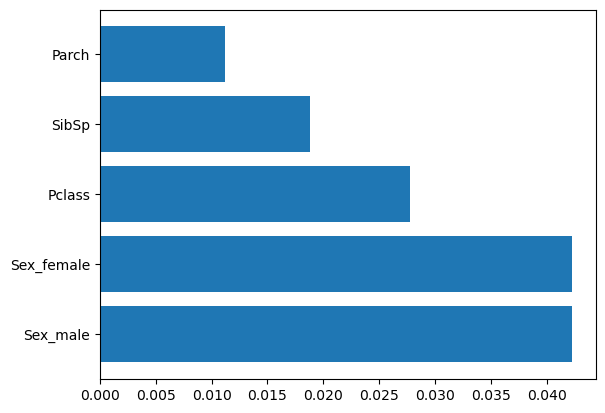

In [60]:
from sklearn.inspection import permutation_importance

perm= permutation_importance(best_lr, X_val, y_val ,n_jobs=-1, n_repeats=30, random_state=7604)

names= []
importances= []

for i in perm.importances_mean.argsort()[::-1]:
    if perm.importances_mean[i] - 2 * perm.importances_std[i] > 0:
        print(f"{X_val.columns[i]:<8}"
              f"{perm.importances_mean[i]:.3f}"
              f" +/- {perm.importances_std[i]:.3f}")
        importances.append(perm.importances_mean[i])
        names.append(X_val.columns[i])
        

plt.barh(np.arange(5), importances)
plt.yticks(np.arange(5), names)

## 2.2 RandomForest

### 2.2.1 베이스모델 점수

In [63]:
from sklearn.ensemble import RandomForestClassifier

rf= RandomForestClassifier(random_state=7604)
rf.fit(X_train, y_train)

cross_val(rf)

model_acc: [0.8047138 0.7979798 0.8013468]
model_mean_acc: 0.8013468013468014


### 2.2.2 하이퍼 파라미터 튜닝

#### 최상의 파라미터
best_params: {'warm_start': True, 'n_estimators': 80, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_features': 20, 'max_depth': 10, 'criterion': 'entropy'}2#### 최상의 점수best_scores: 0.833894500561167206

#### n_estimators 튜닝

In [66]:
from sklearn.model_selection import RandomizedSearchCV

params = {
    'n_estimators': np.arange(1, 100, 1)
}

clf= GridSearchCV(rf, params, cv= kfold, n_jobs=-1)
best_clf= clf.fit(X, y)
print(f'best_params: {best_clf.best_params_}')
print(f'best_scores: {best_clf.best_score_}')

best_params: {'n_estimators': 25}
best_scores: 0.8215488215488215


#### max_depth 튜닝

In [68]:
from sklearn.model_selection import RandomizedSearchCV

params = {
    'n_estimators': [25],
    'max_depth': np.arange(1,50,1)

}

clf= GridSearchCV(rf, params, cv= kfold, n_jobs=-1)
best_clf= clf.fit(X, y)
print(f'best_params: {best_clf.best_params_}')
print(f'best_scores: {best_clf.best_score_}')

best_params: {'max_depth': 9, 'n_estimators': 25}
best_scores: 0.8395061728395062


#### min_samples_split, min_samples_leaf 튜닝

In [70]:
from sklearn.model_selection import RandomizedSearchCV

params = {
    'min_samples_split': np.arange(0,50,5),
    'min_samples_leaf': np.arange(0,50,5),
    'max_depth': [9],
    'n_estimators': [25]
}

clf= GridSearchCV(rf, params, cv= kfold, n_jobs=-1)
best_clf= clf.fit(X, y)
print(f'best_params: {best_clf.best_params_}')
print(f'best_scores: {best_clf.best_score_}')

best_params: {'max_depth': 9, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 25}
best_scores: 0.8215488215488215


C:\Users\dlwog\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
57 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\dlwog\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\dlwog\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\dlwog\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\dlwog\anaconda3\Lib\site-packages

#### max_features, criterion, warm_start 튜닝

In [104]:
params = {
    'min_samples_split':[5],
    'min_samples_leaf': [25],
    'max_depth': [9],
    'n_estimators': [25],
    'max_features': np.arange(0.2, 1, .001),
    'warm_start': [True, False],
    'criterion': ['entropy', 'gini']
}

clf= GridSearchCV(rf, params, cv= kfold, n_jobs=-1)
best_clf= clf.fit(X, y)
print(f'best_params: {best_clf.best_params_}')
print(f'best_scores: {best_clf.best_score_}')

best_params: {'criterion': 'entropy', 'max_depth': 9, 'max_features': 0.5240000000000002, 'min_samples_leaf': 25, 'min_samples_split': 5, 'n_estimators': 25, 'warm_start': True}
best_scores: 0.8035914702581369


#### 이전 결과를 바탕으로 모든 변수 전체 튜닝

In [108]:
params = {
    'min_samples_split':[2, 5, 10, 20],
    'min_samples_leaf': [10, 25, 50],
    'max_depth': [7, 9, 11],
    'n_estimators': [10, 25, 50, 100],
    'max_features': [0.3, 0.5, 0.7],
    'warm_start': [True, False],
    'criterion': ['entropy', 'gini']
}

clf= GridSearchCV(rf, params, cv= kfold, n_jobs=-1)
best_clf= clf.fit(X, y)
print(f'best_params: {best_clf.best_params_}')
print(f'best_scores: {best_clf.best_score_}')

best_params: {'criterion': 'entropy', 'max_depth': 7, 'max_features': 0.7, 'min_samples_leaf': 10, 'min_samples_split': 2, 'n_estimators': 25, 'warm_start': True}
best_scores: 0.8181818181818182


In [112]:
best_rf= best_clf.best_estimator_
best_rf.fit(X_train, y_train)

C:\Users\dlwog\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:468: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(


RandomForestClassifier(criterion='entropy', max_depth=7, max_features=0.7,
                       min_samples_leaf=10, n_estimators=25, random_state=7604,
                       warm_start=True)

In [142]:
import pickle
import joblib
from sklearn.ensemble import RandomForestClassifier

joblib.dump(RandomForestClassifier(criterion='entropy', max_depth=7, max_features=0.7,
                       min_samples_leaf=10, n_estimators=25, random_state=7604,
                       warm_start=True), 'titanic_forest_model.pkl')

['titanic_forest_model.pkl']

### 2.2.3 변수 중요도

##### 1) Pclass: 티켁 등급
##### 2) Sex: 성
##### 3) Age: 나이
##### 4) Fare: 요금

Sex_male0.042 +/- 0.018
Sex_female0.042 +/- 0.018
Pclass  0.028 +/- 0.011
SibSp   0.019 +/- 0.007
Parch   0.011 +/- 0.003


([<matplotlib.axis.YTick at 0x253c234ce60>,
 [Text(0, 0, 'Sex_male'),
  Text(0, 1, 'Sex_female'),
  Text(0, 2, 'Pclass'),
  Text(0, 3, 'SibSp'),
  Text(0, 4, 'Parch')])

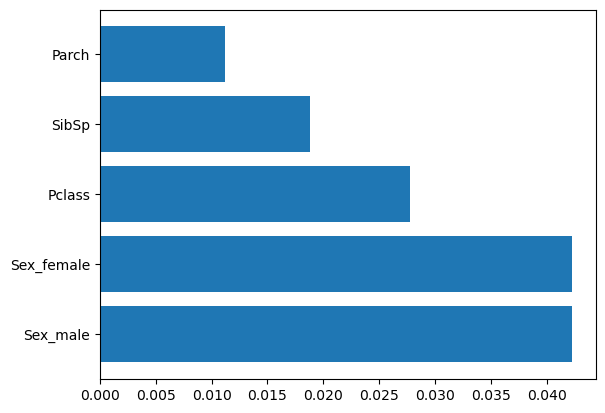

In [116]:
from sklearn.inspection import permutation_importance

perm= permutation_importance(best_lr, X_val, y_val ,n_jobs=-1, n_repeats=30, random_state=7604)

names= []
importances= []

for i in perm.importances_mean.argsort()[::-1]:
    if perm.importances_mean[i] - 2 * perm.importances_std[i] > 0:
        print(f"{X_val.columns[i]:<8}"
              f"{perm.importances_mean[i]:.3f}"
              f" +/- {perm.importances_std[i]:.3f}")
        importances.append(perm.importances_mean[i])
        names.append(X_val.columns[i])
        

plt.barh(np.arange(5), importances)
plt.yticks(np.arange(5), names)

## 2.3 XGboost

### 2.3.1 베이스 모델

In [238]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state= 7604)

cross_val(xgb)

model_acc: [0.8047138 0.7979798 0.8013468]
model_mean_acc: 0.8013468013468014


### 2.3.2 하이퍼 파라미터 튜닝

#### n_estimators 튜닝

In [131]:
params= {'n_estimators': np.arange(0, 200, 1)}
clf= GridSearchCV(xgb, params, cv= kfold, n_jobs=-1)
best_clf= clf.fit(X, y)
print(f'best_params: {best_clf.best_params_}')
print(f'best_scores: {best_clf.best_score_}')

best_params: {'n_estimators': 4}
best_scores: 0.8417508417508418


#### max_depth, min_child_weight 튜닝

In [139]:
params= {'n_estimators': [4],
        'max_depth': np.arange(1,50,1),
        'min_child_weight': np.arange(1,10,0.1)}
clf= GridSearchCV(xgb, params, cv= kfold, n_jobs=-1)
best_clf= clf.fit(X, y)
print(f'best_params: {best_clf.best_params_}')
print(f'best_scores: {best_clf.best_score_}')

best_params: {'max_depth': 8, 'min_child_weight': 1.1, 'n_estimators': 4}
best_scores: 0.8428731762065095


#### Gamma 튜닝

In [149]:
params= {'n_estimators': [4],
        'max_depth': [8],
        'min_child_weight': [1.1],
        'gamma': np.arange(0, 2, 0.01)
        }
clf= GridSearchCV(xgb, params, cv= kfold, n_jobs=-1)
best_clf= clf.fit(X, y)
print(f'best_params: {best_clf.best_params_}')
print(f'best_scores: {best_clf.best_score_}')

best_params: {'gamma': 0.0, 'max_depth': 8, 'min_child_weight': 1.1, 'n_estimators': 4}
best_scores: 0.8428731762065095


#### subsample & colsample_bytree 튜닝

In [151]:
params= {'n_estimators': [4],
        'max_depth': [8],
        'min_child_weight': [1.1],
        'gamma': [0],
        'subsample': np.arange(0.5,1,.01),
        'colsample_bytree': np.arange(0.5,1,.01)
        }
clf= GridSearchCV(xgb, params, cv= kfold, n_jobs=-1)
best_clf= clf.fit(X, y)
print(f'best_params: {best_clf.best_params_}')
print(f'best_scores: {best_clf.best_score_}')

best_params: {'colsample_bytree': 0.7200000000000002, 'gamma': 0, 'max_depth': 8, 'min_child_weight': 1.1, 'n_estimators': 4, 'subsample': 0.8100000000000003}
best_scores: 0.8316498316498318


#### alpha 튜닝

In [157]:
params= {'n_estimators': [4],
        'max_depth': [8],
        'min_child_weight': [1.1],
        'gamma': [0],
        'subsample': [0.81],
        'colsample_bytree': [0.72],
        'alpha': np.arange(1, 10, .01)
        }
clf= GridSearchCV(xgb, params, cv= kfold, n_jobs=-1)
best_clf= clf.fit(X, y)
print(f'best_params: {best_clf.best_params_}')
print(f'best_scores: {best_clf.best_score_}')

best_params: {'alpha': 1.4200000000000004, 'colsample_bytree': 0.72, 'gamma': 0, 'max_depth': 8, 'min_child_weight': 1.1, 'n_estimators': 4, 'subsample': 0.81}
best_scores: 0.8249158249158249


#### lambda 튜닝

In [159]:
params= {'n_estimators': [4],
        'max_depth': [8],
        'min_child_weight': [1.1],
        'gamma': [0],
        'subsample': [0.81],
        'colsample_bytree': [0.72],
        'alpha': [1.42],
        'lambda': np.arange(1,10,.01)
        }

clf= GridSearchCV(xgb, params, cv= kfold, n_jobs=-1)
best_clf= clf.fit(X, y)
print(f'best_params: {best_clf.best_params_}')
print(f'best_scores: {best_clf.best_score_}')

best_params: {'alpha': 1.42, 'colsample_bytree': 0.72, 'gamma': 0, 'lambda': 1.0, 'max_depth': 8, 'min_child_weight': 1.1, 'n_estimators': 4, 'subsample': 0.81}
best_scores: 0.8249158249158249


#### learning_rate 튜닝

In [165]:
params= {'n_estimators': [4],
        'max_depth': [8],
        'min_child_weight': [1.1],
        'gamma': [0],
        'subsample': [0.81],
        'colsample_bytree': [0.72],
        'alpha': [1.42],
        'lambda': [1.0],
        'learning_rate': np.arange(0, 1, .001)
        }
clf= GridSearchCV(xgb, params, cv= kfold, n_jobs=-1)
best_clf= clf.fit(X, y)
print(f'best_params: {best_clf.best_params_}')
print(f'best_scores: {best_clf.best_score_}')

best_params: {'alpha': 1.42, 'colsample_bytree': 0.72, 'gamma': 0, 'lambda': 1.0, 'learning_rate': 0.656, 'max_depth': 8, 'min_child_weight': 1.1, 'n_estimators': 4, 'subsample': 0.81}
best_scores: 0.8361391694725029


#### 이전 결과를 바탕으로 변수 동시 튜닝

In [244]:
params= {'n_estimators': [2, 5, 8, 10, 12],
        'max_depth': [7, 8, 9, 11, 13],
        'min_child_weight': [.6, .8, 1.1],
        'gamma': [.001],
        'subsample': [0.81],
        'colsample_bytree': [.6, 0.72, .8],
        'alpha': [1.42],
        'lambda': [.5, .7, 1.0],
        'learning_rate': [.5, 0.656, .7, 1]
        }
clf= GridSearchCV(xgb, params, cv= kfold, n_jobs=-1)
best_clf= clf.fit(X, y)
print(f'best_params: {best_clf.best_params_}')
print(f'best_scores: {best_clf.best_score_}')

best_params: {'alpha': 1.42, 'colsample_bytree': 0.72, 'gamma': 0.001, 'lambda': 0.7, 'learning_rate': 0.656, 'max_depth': 11, 'min_child_weight': 0.8, 'n_estimators': 8, 'subsample': 0.81}
best_scores: 0.8496071829405163


### 2.3.3 변수 중요도
##### Sex, Pcalss, Age가 중요한 모델 탄생

Age     0.074 +/- 0.016
Sex_female0.064 +/- 0.016
Sex_male0.049 +/- 0.018
Pclass  0.045 +/- 0.012
Fare    0.034 +/- 0.011
SibSp   0.013 +/- 0.006
Cabin_loc_C0.005 +/- 0.002


([<matplotlib.axis.YTick at 0x253c7e54740>,
 [Text(0, 0, 'Age'),
  Text(0, 1, 'Sex_female'),
  Text(0, 2, 'Sex_male'),
  Text(0, 3, 'Pclass'),
  Text(0, 4, 'Fare'),
  Text(0, 5, 'SibSp'),
  Text(0, 6, 'Cabin_loc_C')])

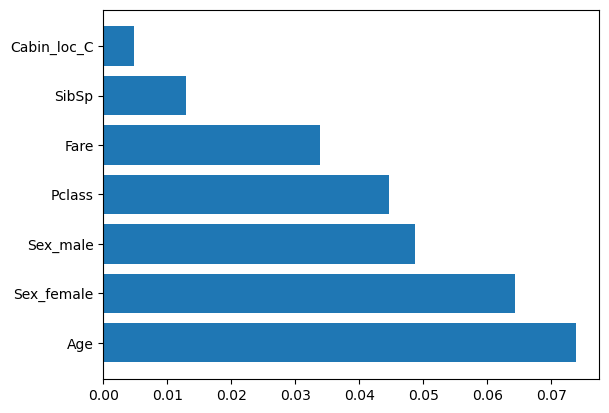

In [178]:
from sklearn.inspection import permutation_importance

perm= permutation_importance(best_clf, X_val, y_val ,n_jobs=-1, n_repeats=30, random_state=7604)

names= []
importances= []

for i in perm.importances_mean.argsort()[::-1]:
    if perm.importances_mean[i] - 2 * perm.importances_std[i] > 0:
        print(f"{X_val.columns[i]:<8}"
              f"{perm.importances_mean[i]:.3f}"
              f" +/- {perm.importances_std[i]:.3f}")
        importances.append(perm.importances_mean[i])
        names.append(X_val.columns[i])
        

plt.barh(np.arange(7), importances)
plt.yticks(np.arange(7), names)

In [252]:
best_xgb= best_clf.best_estimator_
best_xgb.fit(X_train, y_train)

XGBClassifier(alpha=1.42, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.72, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.001, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=0.7, learning_rate=0.656,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=11, max_leaves=None,
              min_child_weight=0.8, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=8, n_jobs=None, ...)

In [254]:
import pickle
import joblib
from xgboost import XGBClassifier

joblib.dump(best_xgb, 'titanic_xgb_model.pkl')

['titanic_xgb_model.pkl']

## 2.4 Gradient Boosting

### 2.4.1 베이스 모델

In [186]:
from sklearn.ensemble import GradientBoostingClassifier
gbc= GradientBoostingClassifier(random_state=7604)
gbc.fit(X_train, y_train)

cross_val(gbc)

model_acc: [0.8047138 0.7979798 0.8013468]
model_mean_acc: 0.8013468013468014


### 2.4.2 하이퍼파라미터 튜닝

#### n_estimators 튜닝

In [188]:
params= {'n_estimators': np.arange(0,100, 1)}

clf= GridSearchCV(gbc, params, cv= kfold, n_jobs=-1)
best_clf= clf.fit(X, y)
print(f'best_params: {best_clf.best_params_}')
print(f'best_scores: {best_clf.best_score_}')

best_params: {'n_estimators': 27}
best_scores: 0.8372615039281706


C:\Users\dlwog\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
3 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\dlwog\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\dlwog\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\dlwog\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\dlwog\anaconda3\Lib\site-packages\s

#### learning_rate 튜닝

In [190]:
params= {'n_estimators': [27],
        'learning_rate': np.arange(0,1,.001)}

clf= GridSearchCV(gbc, params, cv= kfold, n_jobs=-1)
best_clf= clf.fit(X, y)
print(f'best_params: {best_clf.best_params_}')
print(f'best_scores: {best_clf.best_score_}')

best_params: {'learning_rate': 0.132, 'n_estimators': 27}
best_scores: 0.840628507295174


#### learning_rate & max_depth 튜닝

In [192]:
params= {'n_estimators': [27],
        'learning_rate': [0.13],
        'max_depth': np.arange(0,100, 1)}

clf= GridSearchCV(gbc, params, cv= kfold, n_jobs=-1)
best_clf= clf.fit(X, y)
print(f'best_params: {best_clf.best_params_}')
print(f'best_scores: {best_clf.best_score_}')

best_params: {'learning_rate': 0.13, 'max_depth': 3, 'n_estimators': 27}
best_scores: 0.8361391694725029


C:\Users\dlwog\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
3 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\dlwog\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\dlwog\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\dlwog\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\dlwog\anaconda3\Lib\site-packages\s

####  min_samples_leaf & min_samples_split 튜닝 

In [198]:
params= {'n_estimators': [27],
        'learning_rate': [0.13],
        'max_depth': [3],
        'min_samples_leaf': np.arange(2, 100, 5), 
        'min_samples_split': np.arange(30, 70, 3)}

clf= GridSearchCV(gbc, params, cv= kfold, n_jobs=-1)
best_clf= clf.fit(X, y)
print(f'best_params: {best_clf.best_params_}')
print(f'best_scores: {best_clf.best_score_}')

best_params: {'learning_rate': 0.13, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 48, 'n_estimators': 27}
best_scores: 0.8383838383838386


#### subsample 튜닝

In [200]:
params= {'n_estimators': [27],
        'learning_rate': [0.13],
        'max_depth': [3],
        'min_samples_leaf': [2], 
        'min_samples_split': [48],
        'subsample': np.arange(0,1, .01)
        }

clf= GridSearchCV(gbc, params, cv= kfold, n_jobs=-1)
best_clf= clf.fit(X, y)
print(f'best_params: {best_clf.best_params_}')
print(f'best_scores: {best_clf.best_score_}')

best_params: {'learning_rate': 0.13, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 48, 'n_estimators': 27, 'subsample': 0.97}
best_scores: 0.8395061728395062


C:\Users\dlwog\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
3 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\dlwog\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\dlwog\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\dlwog\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\dlwog\anaconda3\Lib\site-packages\s

#### max_features 튜닝

In [208]:
params= {'n_estimators': [27],
        'learning_rate': [0.13],
        'max_depth': [3],
        'min_samples_leaf': [2], 
        'min_samples_split': [48],
        'subsample': [0.97],
         'max_features': np.arange(0, 1, 0.001)
        }

clf= GridSearchCV(gbc, params, cv= kfold, n_jobs=-1)
best_clf= clf.fit(X, y)
print(f'best_params: {best_clf.best_params_}')
print(f'best_scores: {best_clf.best_score_}')

best_params: {'learning_rate': 0.13, 'max_depth': 3, 'max_features': 0.905, 'min_samples_leaf': 2, 'min_samples_split': 48, 'n_estimators': 27, 'subsample': 0.97}
best_scores: 0.8383838383838383


C:\Users\dlwog\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
3 fits failed out of a total of 3000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\dlwog\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\dlwog\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\dlwog\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\dlwog\anaconda3\Lib\site-packages\

#### 순차적 튜닝 결과를 바탕으로 한 GridSearchCV

In [214]:
params= {'n_estimators': [10, 27, 50],
        'learning_rate': [.001, .01, .05, .1, .5, 1],
        'max_depth': [1, 3, 5, 7],
        'min_samples_leaf': [1, 2, 5, 8], 
        'min_samples_split': [0, 10, 20, 30, 48, 70],
        'subsample': [.5, .6 ,.7, .8, .9, 1],
         'max_features': [.7, .8, .9, 1]
        }

clf= GridSearchCV(gbc, params, cv= kfold, n_jobs=-1)
best_clf= clf.fit(X, y)
print(f'best_params: {best_clf.best_params_}')
print(f'best_scores: {best_clf.best_score_}')

C:\Users\dlwog\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
20736 fits failed out of a total of 124416.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20736 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\dlwog\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\dlwog\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\dlwog\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\dlwog\anaconda3\Lib\site

best_params: {'learning_rate': 0.1, 'max_depth': 5, 'max_features': 0.9, 'min_samples_leaf': 1, 'min_samples_split': 30, 'n_estimators': 50, 'subsample': 0.7}
best_scores: 0.8473625140291808


### 2.4.3 변수 중요도
##### Pcalss, Sex, Age가 중요한 것으로 나타남

Age     0.105 +/- 0.019
Sex_male0.093 +/- 0.016
Pclass  0.083 +/- 0.011
Fare    0.047 +/- 0.010
Sex_female0.043 +/- 0.013
Embarked_S0.020 +/- 0.006
SibSp   0.014 +/- 0.004


([<matplotlib.axis.YTick at 0x253c85c4740>,
 [Text(0, 0, 'Age'),
  Text(0, 1, 'Sex_male'),
  Text(0, 2, 'Pclass'),
  Text(0, 3, 'Fare'),
  Text(0, 4, 'Sex_female'),
  Text(0, 5, 'Embarked_S'),
  Text(0, 6, 'SibSp')])

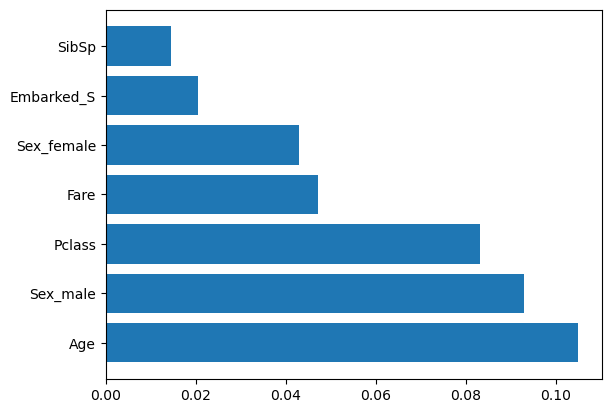

In [220]:
from sklearn.inspection import permutation_importance

perm= permutation_importance(best_clf, X_val, y_val ,n_jobs=-1, n_repeats=30, random_state=7604)

names= []
importances= []

for i in perm.importances_mean.argsort()[::-1]:
    if perm.importances_mean[i] - 2 * perm.importances_std[i] > 0:
        print(f"{X_val.columns[i]:<8}"
              f"{perm.importances_mean[i]:.3f}"
              f" +/- {perm.importances_std[i]:.3f}")
        importances.append(perm.importances_mean[i])
        names.append(X_val.columns[i])
        

plt.barh(np.arange(7), importances)
plt.yticks(np.arange(7), names)

In [222]:
best_gbc= best_clf.best_estimator_
best_gbc.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=5, max_features=0.9, min_samples_split=30,
                           n_estimators=50, random_state=7604, subsample=0.7)

In [148]:
import pickle
import joblib
from sklearn.ensemble import GradientBoostingClassifier

joblib.dump(GradientBoostingClassifier(max_depth=5, max_features=0.9, min_samples_split=30,
                           n_estimators=50, random_state=7604, subsample=0.7), 
            'titanic_gradient_model.pkl')

['titanic_gradient_model.pkl']

## 2.5 AdaBoost

### 2.5.1 베이스 모델

In [226]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada= AdaBoostClassifier(random_state=7604)
cross_val(ada)

model_acc: [0.8047138 0.7979798 0.8013468]
model_mean_acc: 0.8013468013468014


### 2.5.2 하이퍼파라미터 튜닝

#### base_estimators 튜닝

In [230]:
params= {
    'estimator': [DecisionTreeClassifier(max_depth=1), 
                        DecisionTreeClassifier(max_depth=2), 
                        DecisionTreeClassifier(max_depth=3)]
}

clf= GridSearchCV(ada, params, cv= kfold, n_jobs=-1)
best_clf= clf.fit(X, y)
print(f'best_params: {best_clf.best_params_}')
print(f'best_scores: {best_clf.best_score_}')

best_params: {'estimator': DecisionTreeClassifier(max_depth=1)}
best_scores: 0.8047138047138048


C:\Users\dlwog\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


#### n_estimators & learning_rate 튜닝

In [239]:
params= {
    'estimator': [DecisionTreeClassifier(max_depth=1)],
    'n_estimators': np.arange(0,50,1),
    'learning_rate': np.arange(0.5, 1, .05)
}

clf= GridSearchCV(ada, params, cv= kfold, n_jobs=-1)
best_clf= clf.fit(X, y)
print(f'best_params: {best_clf.best_params_}')
print(f'best_scores: {best_clf.best_score_}')

best_params: {'estimator': DecisionTreeClassifier(max_depth=1), 'learning_rate': 0.9500000000000004, 'n_estimators': 34}
best_scores: 0.8148148148148149


C:\Users\dlwog\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
30 fits failed out of a total of 1500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\dlwog\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\dlwog\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\dlwog\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\dlwog\anaconda3\Lib\site-package

#### algorithm 튜닝

In [241]:
params= {
    'estimator': [DecisionTreeClassifier(max_depth=1)],
    'n_estimators': [34],
    'learning_rate': [0.95],
    'algorithm': ['SAMME', 'SAMME.R']
    
    
}

clf= GridSearchCV(ada, params, cv= kfold, n_jobs=-1)
best_clf= clf.fit(X, y)
print(f'best_params: {best_clf.best_params_}')
print(f'best_scores: {best_clf.best_score_}')

best_params: {'algorithm': 'SAMME.R', 'estimator': DecisionTreeClassifier(max_depth=1), 'learning_rate': 0.95, 'n_estimators': 34}
best_scores: 0.8148148148148149


C:\Users\dlwog\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


#### 순차적 튜닝 결과를 바탕으로 한 GridSearch

In [245]:
params= {
    'estimator': [DecisionTreeClassifier(max_depth=1), 
                        DecisionTreeClassifier(max_depth=2), 
                        DecisionTreeClassifier(max_depth=3)],
    'n_estimators': [10, 20, 34, 50, 60, 100, 150, 200],
    'learning_rate': [.7, .8, .95, 1],
    'algorithm': ['SAMME', 'SAMME.R']
    
    
}

clf= GridSearchCV(ada, params, cv= kfold, n_jobs=-1)
best_clf= clf.fit(X, y)
print(f'best_params: {best_clf.best_params_}')
print(f'best_scores: {best_clf.best_score_}')

best_params: {'algorithm': 'SAMME', 'estimator': DecisionTreeClassifier(max_depth=2), 'learning_rate': 0.95, 'n_estimators': 60}
best_scores: 0.8338945005611672


In [247]:
best_ada= clf.best_estimator_
best_ada.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
                   estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=0.95, n_estimators=60, random_state=7604)

In [154]:
import pickle
import joblib
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

joblib.dump(AdaBoostClassifier(algorithm='SAMME',
                   estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=0.95, n_estimators=60, random_state=7604), 
            'titanic_adaboost_model.pkl')

['titanic_adaboost_model.pkl']

### 2.5.3 변수중요도
Sex가 중요 변수로 작용하는 모델 탄생

Sex_male0.184 +/- 0.021
SibSp   0.028 +/- 0.005
Age     0.027 +/- 0.008
Pclass  0.017 +/- 0.008
Cabin_loc_A0.004 +/- 0.001


([<matplotlib.axis.YTick at 0x253c85c4320>,
 [Text(0, 0, 'Sex_male'),
  Text(0, 1, 'SibSp'),
  Text(0, 2, 'Age'),
  Text(0, 3, 'Pclass'),
  Text(0, 4, 'Cabin_loc_A')])

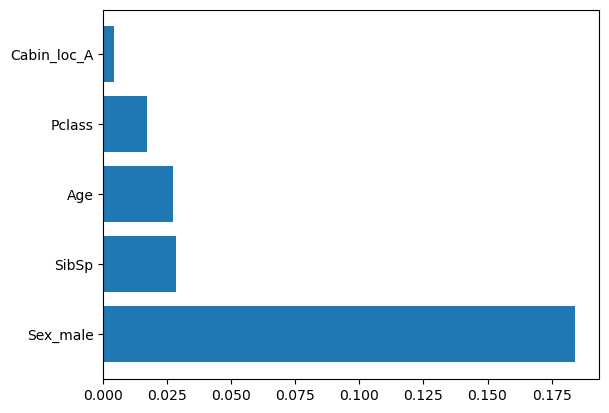

In [254]:
from sklearn.inspection import permutation_importance

perm= permutation_importance(best_ada, X_val, y_val ,n_jobs=-1, n_repeats=30, random_state=7604)

names= []
importances= []

for i in perm.importances_mean.argsort()[::-1]:
    if perm.importances_mean[i] - 2 * perm.importances_std[i] > 0:
        print(f"{X_val.columns[i]:<8}"
              f"{perm.importances_mean[i]:.3f}"
              f" +/- {perm.importances_std[i]:.3f}")
        importances.append(perm.importances_mean[i])
        names.append(X_val.columns[i])
        

plt.barh(np.arange(5), importances)
plt.yticks(np.arange(5), names)

## 2.6 Ensemble 모델

### 2.6.1 모델 불러오기

In [78]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score
import pickle
import joblib

# 로지스틱
best_lr = joblib.load('titanic_logistic_model.pkl')
best_lr.fit(X, y)

# 익스트림 그레이디언트 부스팅
best_xgb = joblib.load('titanic_xgb_model.pkl')
best_xgb.fit(X, y)

# 랜덤포레스트
best_rf = joblib.load('titanic_forest_model.pkl')
best_rf.fit(X, y)

# 그레이디언트 부스팅
best_gbc = joblib.load('titanic_gradient_model.pkl')
best_gbc.fit(X, y)

# 에이다부스트
best_ada = joblib.load('titanic_adaboost_model.pkl')
best_ada.fit(X, y)


C:\Users\dlwog\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


AdaBoostClassifier(algorithm='SAMME',
                   estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=0.95, n_estimators=60, random_state=7604)

### 2.6.2 모델 상관도 측정

In [80]:
cor_df= pd.DataFrame(
    {'lr': best_lr.predict(X),
    'xgb': best_xgb.predict(X),
    'rf': best_rf.predict(X),
    'gbc': best_gbc.predict(X),
    'ada': best_ada.predict(X),}
)

cor_df.corr()

,lr,xgb,rf,gbc,ada
lr,1.000000,0.784024,0.817580,0.763227,0.847502
xgb,0.784024,1.000000,0.875981,0.925751,0.826694
rf,0.817580,0.875981,1.000000,0.874582,0.825066
gbc,0.763227,0.925751,0.874582,1.000000,0.815302
ada,0.847502,0.826694,0.825066,0.815302,1.000000


### 2.6.3 VotingClassifier

In [82]:
# VotingClassifier 구축
estimators= []
estimators.append(('logistic', best_lr))
estimators.append(('xgb', best_xgb))
estimators.append(('adaboost', best_ada))
ensemble= VotingClassifier(estimators)

# 앙상블 평가
scores= cross_val_score(ensemble, X, y, cv=kfold)
print(scores)
print(scores.mean())

C:\Users\dlwog\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dlwog\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[0.84848485 0.84175084 0.84511785]
0.8451178451178452


C:\Users\dlwog\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [84]:
import pickle
import joblib

joblib.dump(ensemble, 'titanic_voting_model2.pkl')

['titanic_voting_model2.pkl']

### 2.6.4 Stacking model

In [150]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# 베이스 모델 리스트
base_models= []
base_models.append(('lr', best_lr))
base_models.append(('xgb', best_xgb))
base_models.append(('ada', best_ada))
base_models.append(('forest', best_rf))
base_models.append(('gbc', best_gbc))

# 메타 모델
meta_model= LogisticRegression(max_iter=10000)

# StackingClassifier
stacking= StackingClassifier(estimators=base_models, final_estimator=meta_model)

# model evaluation
scores= cross_val_score(stacking, X, y, cv= kfold)
print(scores.mean())

C:\Users\dlwog\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dlwog\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

0.8451178451178452


In [152]:
stacking.fit(X,y)

C:\Users\dlwog\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dlwog\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

StackingClassifier(estimators=[('lr',
                                LogisticRegression(C=0.08858667904100823,
                                                   max_iter=150,
                                                   random_state=7604)),
                               ('xgb',
                                XGBClassifier(alpha=1.42, base_score=None,
                                              booster=None, callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=0.72,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=N...
                                                   random_state=7604)),
                               ('forest',
                                RandomForestClassifier(criterion='entropy',
                                                       max_depth=7,
                                                       max_features=0.7,
                                                       min_samples_leaf=10,
                                                       n_estimators=25,
                                                       random_state=7604,
                                                       warm_start=True)),
                               ('gbc',
                                GradientBoostingClassifier(max_depth=5,
                                                           max_features=0.9,
                                                           min_samples_split=30,
                                                           n_estimators=50,
                                                           random_state=7604,
                                                           subsample=0.7))],
                   final_estimator=LogisticRegression(max_iter=10000))

## 2.7 결과 제출

In [94]:
import pickle
import joblib

ensemble = joblib.load('titanic_voting_model2.pkl')
ensemble.fit(X, y)

df_test['Cabin_loc_T']= [0]*df_test.shape[0]
df_test= df_test[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin_Null', 'N_ticket',
       'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'Cabin_loc_A', 'Cabin_loc_B', 'Cabin_loc_C', 'Cabin_loc_D',
       'Cabin_loc_E', 'Cabin_loc_F', 'Cabin_loc_G', 'Cabin_loc_T',
       'Cabin_loc_Z']]
df_test['Fare']= df_test['Fare'].fillna(df_test['Fare'].median())

C:\Users\dlwog\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 2.7.1 VotinfClassifier, StackingClassifier 및 각 모델 예측

In [97]:
# VotingClassifier 예측
pred= {'PassengerId': passid,
      'Survived': ensemble.predict(df_test)}

pred_df= pd.DataFrame(pred)

pred_df.to_csv('titanic_voting_prediction2.csv', index=False)

In [154]:
# StackingVlassifier 예측
pred= {'PassengerId': passid,
      'Survived': stacking.predict(df_test)}

pred_df= pd.DataFrame(pred)

pred_df.to_csv('titanic_stacking_prediction2.csv', index=False)